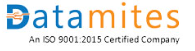

**Project Team ID**: PTID-CDS-OCT-23-1670

**Project id**: PRCP-1013-WalkRunClass

**Submitted by**: Anjani Kumar

# **Walk Run Classification**
-----------------------------

## **Business Case-Study**

This project is based on Human motion analysis and activity recognition using wearable watch/sensors, which help to us to classify human activities (either walking or running) based on sensor data collection from wearable devices. We will apply different Machine learning algorithm including: Decision Tree, Random Forest, Gradient Boosting, XG-Boosting and Artificial Neural Network.

-------------------
## **Dataset Description**

This Dataset consists Total of 10 Features and 1 Target(activity).

1) Date	: The calendar date on which an activity was recorded.

2) Time	: The specific time of day when an activity was recorded.

3) Username	: The identifier associated with the individual wearing the wristwatch.

4) Wrist :  Indicates the wrist (left or right) on which the wristwatch is worn.

5) Activity : The type of activity being performed (0 for walking/1 for running).

6) Acceleration_x	: Acceleration along the x-axis measured by the wristwatch's accelerometer.

7) Acceleration_y	: Acceleration along the y-axis measured by the wristwatch's accelerometer.

8) Acceleration_z	: Acceleration along the z-axis measured by the wristwatch's accelerometer.

9) Gyro_x	: Angular velocity around the x-axis measured by the wristwatch's gyroscope.

10) Gyro_y : Angular velocity around the y-axis measured by the wristwatch's gyroscope.

11)	Gyro_z : Angular velocity around the z-axis measured by the wristwatch's gyroscope.

-------------------------------
## **Importing Necessary Packages**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('walkrun.csv')

---
## **Basic Info**

In [ ]:
df.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [ ]:
df.tail()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
88583,2017-7-9,20:9:15:317911028,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,2017-7-9,20:9:15:517889022,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,2017-7-9,20:9:15:717828989,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,2017-7-9,20:9:15:917932987,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755
88587,2017-7-9,20:9:16:117410004,viktor,0,0,0.3140,-0.8008,-0.0911,0.1183,1.0850,1.2814


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


In [ ]:
df.describe()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,0.522170,0.500801,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,0.499511,0.500002,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,0.000000,0.000000,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,0.000000,0.000000,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,1.000000,1.000000,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,1.000000,1.000000,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,1.000000,1.000000,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


In [ ]:
df.describe(include='O')

,date,time,username
count,88588,88588,88588
unique,12,88588,1
top,2017-7-16,13:51:15:847724020,viktor
freq,20480,1,88588


In [ ]:
df.isnull().sum()

date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

-----
## **EDA**

In [ ]:
# We can drop username feature because it have only one name viktor in the entire dataset.

print(df['username'].value_counts())
df.drop('username',axis=1,inplace=True)
df.head()

viktor    88588
Name: username, dtype: int64


,date,time,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


1    46258
0    42330
Name: wrist, dtype: int64

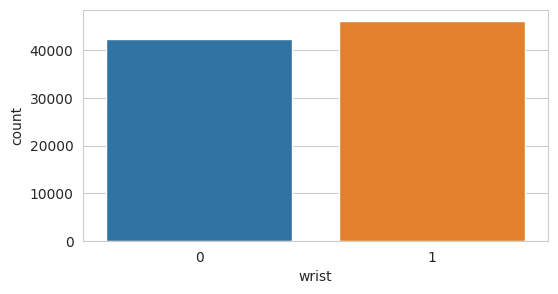

In [ ]:
# For wrist
plt.figure(figsize=(6,3))
sns.countplot(data=df,x='wrist')
df['wrist'].value_counts()

2017-7-16    20480
2017-7-17    11365
2017-7-6     11357
2017-7-15     7934
2017-7-9      7788
2017-7-11     6696
2017-7-10     4337
2017-7-1      4201
2017-6-30     3992
2017-7-2      3933
2017-7-7      3280
2017-7-4      3225
Name: date, dtype: int64

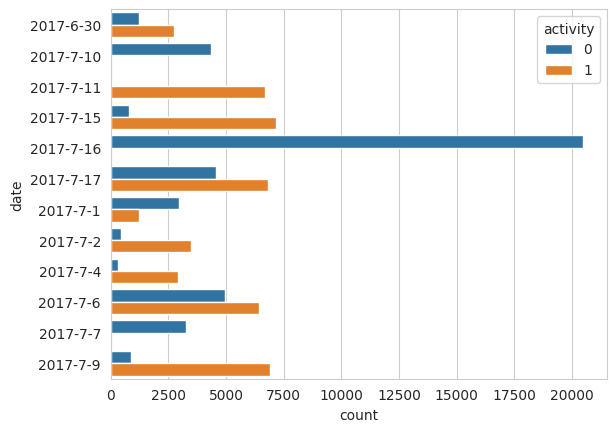

In [ ]:
# For date
sns.countplot(data=df,y='date',hue='activity')
df['date'].value_counts()

In [ ]:
# From the above graph we cannot depict anything from date since it is just date at which motion has been recorded, So we can drop this feature.
df.drop('date',axis=1,inplace=True)
df.head()

,time,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,13:51:15:847724020,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,13:51:16:246945023,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,13:51:16:446233987,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,13:51:16:646117985,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,13:51:16:846738994,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [ ]:
# For time, we will remove seconds and milliseconds for better understandings.

Time=[]
for i in df['time']:
  j=i.rsplit(":", 2)[0]
  Time.append(j)
df['Time']=Time
df[['time','Time']]

,time,Time
0,13:51:15:847724020,13:51
1,13:51:16:246945023,13:51
2,13:51:16:446233987,13:51
3,13:51:16:646117985,13:51
4,13:51:16:846738994,13:51
...,...,...
88583,20:9:15:317911028,20:9
88584,20:9:15:517889022,20:9
88585,20:9:15:717828989,20:9
88586,20:9:15:917932987,20:9


In [ ]:
# We will drop time column since we have Time column.
df.drop('time',axis=1,inplace=True)
df.head()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,Time
0,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,13:51
1,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,13:51
2,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,13:51
3,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,13:51
4,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,13:51


In [ ]:
# We divide Time column into four slots into Morning, Afternoon, Evening, and Night

df.loc[(df['Time']>='04:00') & (df['Time']<'12:00'),'Time']='Morning'
df.loc[(df['Time']>='12:00') & (df['Time']<='17:00'),'Time']='Afternoon'
df.loc[(df['Time']>='17:00') & (df['Time']<'21:00'),'Time']='Evening'
df.loc[(df['Time']>='21:00') & (df['Time']<='23:59'),'Time']='Night'

<Axes: xlabel='Time', ylabel='activity'>

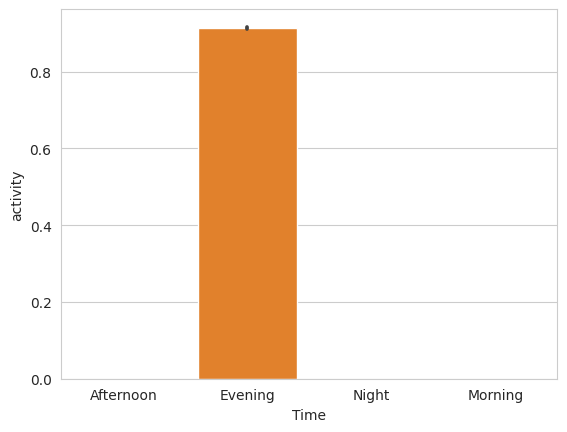

In [ ]:
# Then we will plot bar graph between Time and activity
sns.barplot(data=df,x='Time',y='activity')

In [ ]:
# From the graph above we depict that activity=1 only possible in Evening time and will not affect other time zones, So we can drop this column also.
df.drop('Time',axis=1,inplace=True)
df.head()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


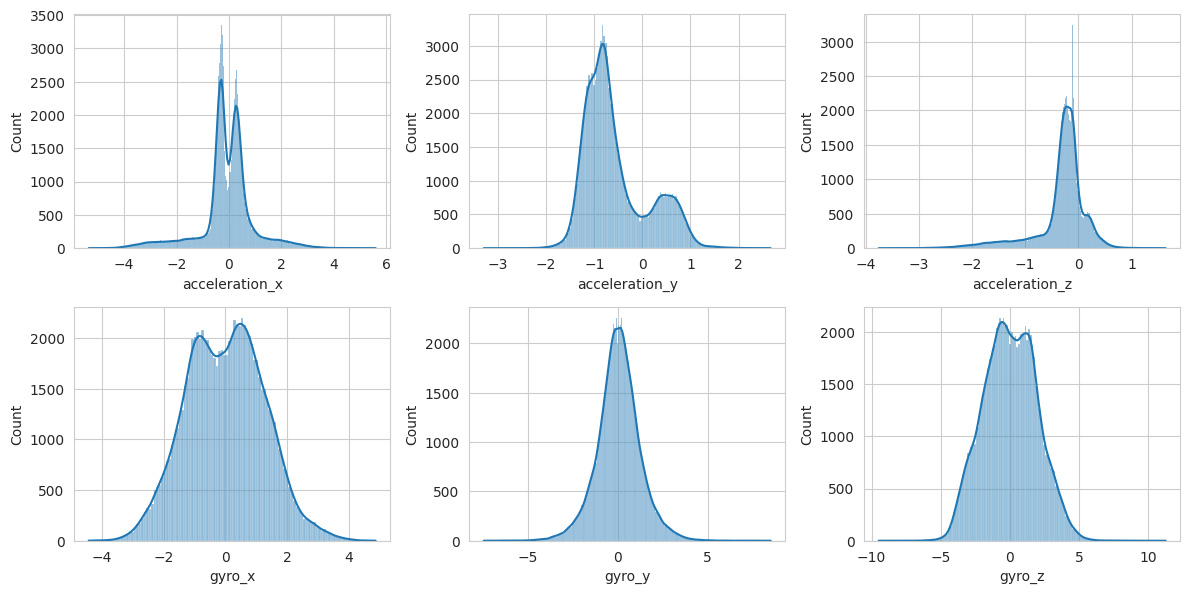

In [ ]:
# Univariate of Features

plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
i=1
for j in df.drop(['wrist','activity'],axis=1):
  plt.subplot(2,3,i)
  sns.histplot(data=df,x=j,kde=True)
  i+=1
plt.tight_layout()
plt.show()

In [ ]:
# Since Skewness lies from -1 to +1, and Kurtosis lies from -1 to +1. So there must some presence of outliers

from scipy import stats
for j in df.drop(['wrist','activity'],axis=1):
  print(j,'Kurtosis :',stats.kurtosis(df[j],fisher=True))
  print(j,'Skewness :',stats.skew(df[j]),'\n')

acceleration_x Kurtosis : 3.420256950423023
acceleration_x Skewness : -0.6209823757563957 

acceleration_y Kurtosis : 0.017875544829505596
acceleration_y Skewness : 0.9077317572083938 

acceleration_z Kurtosis : 4.609418873332021
acceleration_z Skewness : -1.8377425547174362 

gyro_x Kurtosis : -0.2718499866964792
gyro_x Skewness : 0.06908117509241467 

gyro_y Kurtosis : 1.4893958926093074
gyro_y Skewness : -0.02393166496843546 

gyro_z Kurtosis : -0.37335822419672926
gyro_z Skewness : 0.04173176597309396 



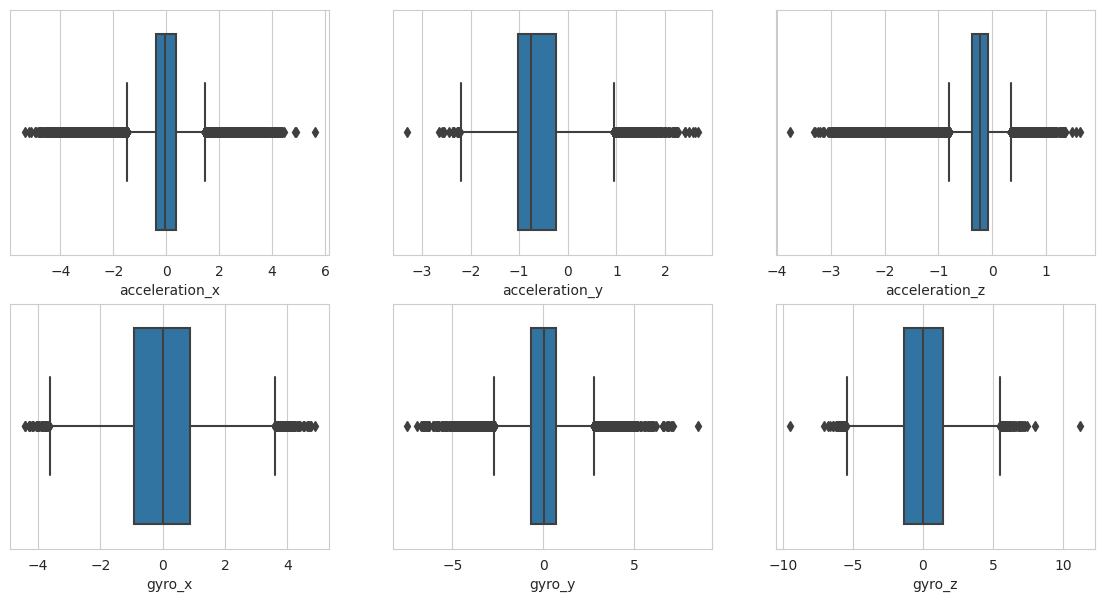

In [ ]:
# Boxplot of Numerical features except wrist and activity

plt.figure(figsize=(14,7))
sns.set_style('whitegrid')
i=1
for j in df.drop(['wrist','activity'],axis=1):
  plt.subplot(2,3,i)
  sns.boxplot(data=df,x=j)
  i+=1
plt.show()

In [ ]:
# Removing of outliers after analysing the graph above

df.drop(df[df['acceleration_x'] > 4.5].index,axis=0,inplace=True)

df.drop(df[df['acceleration_y'] < -2.5].index,axis=0,inplace=True)
df.drop(df[df['acceleration_y'] > 2.3].index,axis=0,inplace=True)

df.drop(df[df['acceleration_z'] < -3.5].index,axis=0,inplace=True)
df.drop(df[df['acceleration_z'] > 1.5].index,axis=0,inplace=True)

df.drop(df[df['gyro_y'] > 6.2].index,axis=0,inplace=True)
df.drop(df[df['gyro_y'] <-7.3].index,axis=0,inplace=True)

df.drop(df[df['gyro_z'] > 7.5].index,axis=0,inplace=True)
df.drop(df[df['gyro_z'] < -8.5].index,axis=0,inplace=True)

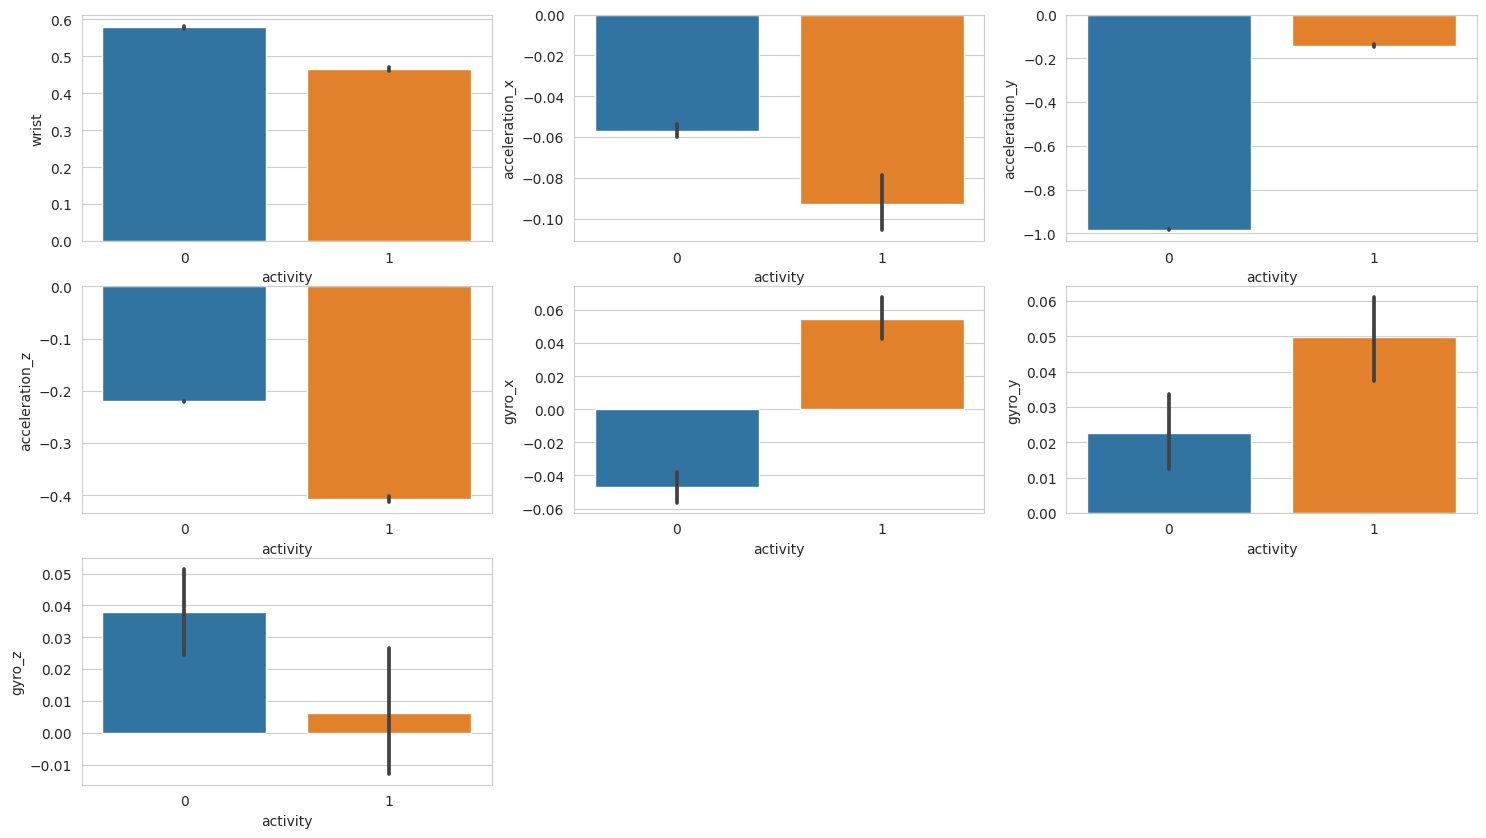

In [ ]:
# Bivariate of Features

plt.figure(figsize=(18,10))
sns.set_style('whitegrid')
i=1
for j in df.drop('activity',axis=1):
    plt.subplot(3,3,i)
    sns.barplot(data=df,x='activity',y=j)
    i+=1
plt.show()

### Analysis From the Graph:

1) Activity is 0 for walking and 1 for running, and wrist is 0 for left hand and 1 for right hand.

2) In accleration_x, running movement is more compared to walking. Also positive value means move right side and negative value means move left side.

3) In accleration_y, walking movement is more compared to running. Also positive value means move forward side and negative value means move backward side.

4) In accleration_z, running movement is more compared to walking. Also positive value means move upward side and negative value means move downward side.

5) We analyse that in gyro_x little bit clockwise rotation is there during walking and anticlockwise rotation is there during running, because gyro positive means anticlockwise rotation and gyro negative means clockwise rotation.

6) We analyse that in gyro_y anticlockwise rotation is there in both during walking and running, but during running movement is more, because gyro positive means anticlockwise rotation and gyro negative means clockwise rotation.

7) We analyse that in gyro_z anticlockwise rotation is there in both during walking and running, but during walking movement is more, because gyro positive means anticlockwise rotation and gyro negative means clockwise rotation.

--------
## **Preprocessing**

In [ ]:
# No null values present
df.isnull().sum()

wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

In [ ]:
# No duplicate rows present
df[df.duplicated()]

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z


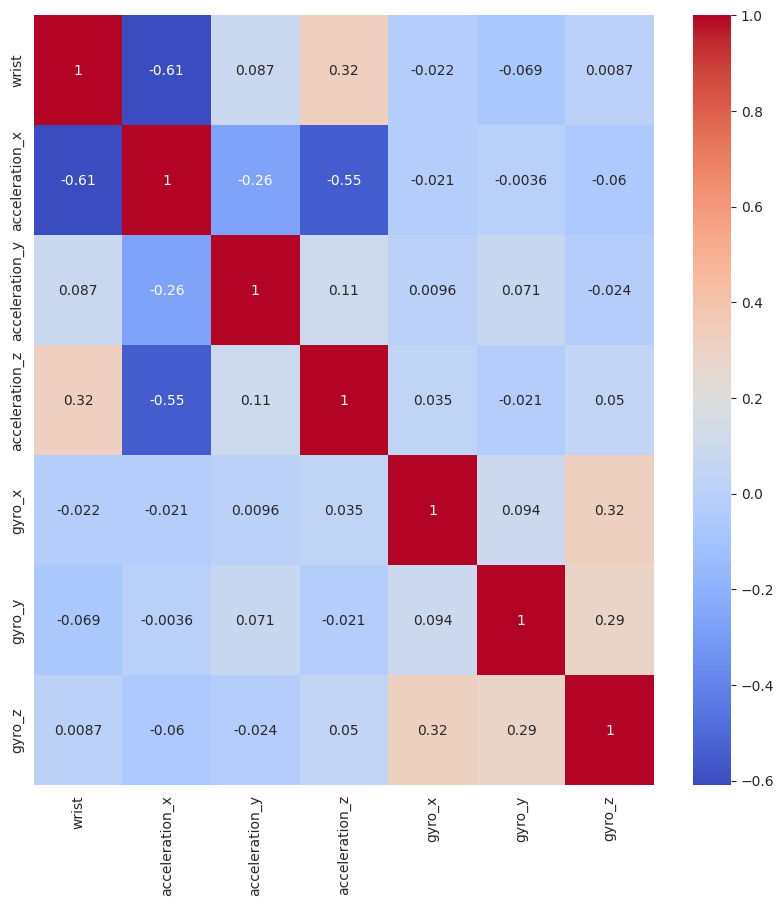

In [ ]:
# Heatmap for correlation between features except activity

plt.figure(figsize=(10,10))
sns.heatmap(df.drop('activity',axis=1).corr(),annot=True,cmap='coolwarm')
plt.show()

# No such correlation present betweeen features.

In [ ]:
df.drop('activity',axis=1).corr()

,wrist,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
wrist,1.000000,-0.609797,0.086762,0.323539,-0.022422,-0.068830,0.008650
acceleration_x,-0.609797,1.000000,-0.264020,-0.552336,-0.020888,-0.003598,-0.060165
acceleration_y,0.086762,-0.264020,1.000000,0.105774,0.009592,0.071330,-0.023938
acceleration_z,0.323539,-0.552336,0.105774,1.000000,0.034751,-0.021068,0.049507
gyro_x,-0.022422,-0.020888,0.009592,0.034751,1.000000,0.093868,0.317695
gyro_y,-0.068830,-0.003598,0.071330,-0.021068,0.093868,1.000000,0.287694
gyro_z,0.008650,-0.060165,-0.023938,0.049507,0.317695,0.287694,1.000000


--------
## **Model Creation**

1) Decision Tree

2) Random Forest

3) Gradient Boosting

4) XG-Boosting

5) Artificial Neural Network

In [ ]:
X=df.drop(['activity'],axis=1)
Y=df['activity']
print('X shape:',X.shape,'&','Y shape:',Y.shape)

# No need to scale the dataset.

X shape: (88555, 7) & Y shape: (88555,)


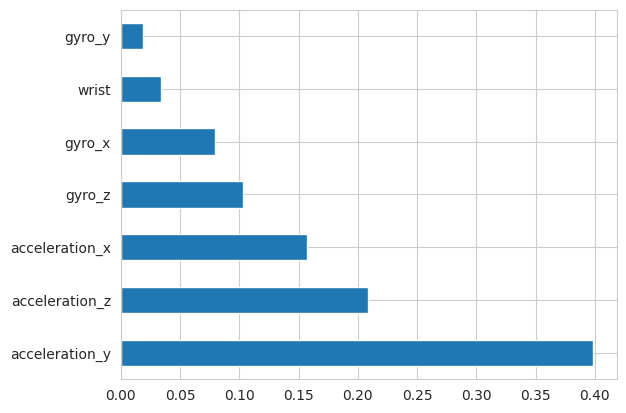

In [ ]:
# Showing important features in the entire datasets using ExtraTreesRegressor.

from sklearn.ensemble import ExtraTreesClassifier
ETR=ExtraTreesClassifier()
ETR.fit(X,Y)
Importances = pd.Series(ETR.feature_importances_, index=X.columns)
Importances.nlargest(9).plot(kind='barh')
plt.show()

# We can analyse that acceleration x,y,z are most important in dataset compared to others.

In [ ]:
# We took 80% dataset for training purpose and remaining 20% dataset for testing purpose because our dataset is normal size.

from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2)
print('Xtrain shape:',Xtrain.shape, '&', 'Xtest shape:',Xtest.shape)
print('Ytrain shape:',Ytrain.shape, '&', 'Ytest shape:',Ytest.shape)

Xtrain shape: (70844, 7) & Xtest shape: (17711, 7)
Ytrain shape: (70844,) & Ytest shape: (17711,)


### **1st Model : Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(Xtrain,Ytrain)

DecisionTreeClassifier()

In [ ]:
# Prediction of test data

Ypred = DTC.predict(Xtest)
print(classification_report(Ytest,Ypred))
DTC_accur = accuracy_score(Ytest,Ypred)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      8854
           1       0.98      0.99      0.98      8857

    accuracy                           0.98     17711
   macro avg       0.98      0.98      0.98     17711
weighted avg       0.98      0.98      0.98     17711



In [ ]:
# Checking overfitting of model or not from training dataset

Ypred_train = DTC.predict(Xtrain)
print(classification_report(Ytrain,Ypred_train))

# It is not overfitted.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35369
           1       1.00      1.00      1.00     35475

    accuracy                           1.00     70844
   macro avg       1.00      1.00      1.00     70844
weighted avg       1.00      1.00      1.00     70844



In [ ]:
# Result of Decision Tree

data=[['Accuracy', '{}%'.format(round(DTC_accur,3)*100)]]
head = ['Result','Decision Tree']
print(tabulate(data,headers=head, tablefmt='grid'))

+----------+-----------------+
| Result   | Decision Tree   |
+==========+=================+
| Accuracy | 98.4%           |
+----------+-----------------+


### **2nd Model : Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(n_estimators=100)
RFC.fit(Xtrain,Ytrain)

RandomForestClassifier()

In [ ]:
# Prediction of test data

Ypred = RFC.predict(Xtest)
print(classification_report(Ytest,Ypred))
RFC_accur = accuracy_score(Ytest,Ypred)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8854
           1       0.99      0.99      0.99      8857

    accuracy                           0.99     17711
   macro avg       0.99      0.99      0.99     17711
weighted avg       0.99      0.99      0.99     17711



In [ ]:
# Checking overfitting of model or not from training dataset

Ypred_train = RFC.predict(Xtrain)
print(classification_report(Ytrain,Ypred_train))

# It is not overfitted.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35369
           1       1.00      1.00      1.00     35475

    accuracy                           1.00     70844
   macro avg       1.00      1.00      1.00     70844
weighted avg       1.00      1.00      1.00     70844



In [ ]:
# Result of Random Forest

data=[['Accuracy', '{}%'.format(round(RFC_accur,3)*100)]]
head = ['Result','Random Forest']
print(tabulate(data,headers=head, tablefmt='grid'))

+----------+-----------------+
| Result   | Random Forest   |
+==========+=================+
| Accuracy | 99.2%           |
+----------+-----------------+


### **3rd Model : Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier()
GBC.fit(Xtrain,Ytrain)

GradientBoostingClassifier()

In [ ]:
# Prediction of test data

Ypred = GBC.predict(Xtest)
print(classification_report(Ytest,Ypred))
GBC_accur = accuracy_score(Ytest,Ypred)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      8854
           1       0.99      0.98      0.98      8857

    accuracy                           0.98     17711
   macro avg       0.98      0.98      0.98     17711
weighted avg       0.98      0.98      0.98     17711



In [ ]:
# Checking overfitting of model or not from training dataset

Ypred_train = GBC.predict(Xtrain)
print(classification_report(Ytrain,Ypred_train))

# It is not overfitted.

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     35369
           1       0.99      0.98      0.99     35475

    accuracy                           0.99     70844
   macro avg       0.99      0.99      0.99     70844
weighted avg       0.99      0.99      0.99     70844



In [ ]:
# Result of Gradient Boosting

data=[['Accuracy', '{}%'.format(round(GBC_accur,3)*100)]]
head = ['Result','Gradient Boosting']
print(tabulate(data,headers=head, tablefmt='grid'))

+----------+---------------------+
| Result   | Gradient Boosting   |
+==========+=====================+
| Accuracy | 98.4%               |
+----------+---------------------+


### **4th Model : XG-Boosting**

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier
XGBC = XGBClassifier()
XGBC.fit(Xtrain,Ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Prediction of test data

Ypred = XGBC.predict(Xtest)
print(classification_report(Ytest,Ypred))
XGBC_accur = accuracy_score(Ytest,Ypred)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8854
           1       0.99      0.99      0.99      8857

    accuracy                           0.99     17711
   macro avg       0.99      0.99      0.99     17711
weighted avg       0.99      0.99      0.99     17711



In [ ]:
# Checking overfitting of model or not from training dataset

Ypred_train = XGBC.predict(Xtrain)
print(classification_report(Ytrain,Ypred_train))

# It is not overfitted.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35369
           1       1.00      1.00      1.00     35475

    accuracy                           1.00     70844
   macro avg       1.00      1.00      1.00     70844
weighted avg       1.00      1.00      1.00     70844



In [ ]:
# Result of XG-Boosting

data=[['Accuracy', '{}%'.format(round(XGBC_accur,3)*100)]]
head = ['Result','XG-Boosting']
print(tabulate(data,headers=head, tablefmt='grid'))

+----------+---------------+
| Result   | XG-Boosting   |
+==========+===============+
| Accuracy | 99.2%         |
+----------+---------------+


### **5th Model : Artificial Neural Network**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
ANN = Sequential()
ANN.add(Dense(units=64, activation='relu'))
ANN.add(Dense(units=32, activation='relu'))
ANN.add(Dense(units=1, activation='sigmoid'))

In [ ]:
# Loss will be binary_crossentropy because activity have 0 or 1 as output.
ANN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
ANN=ANN.fit(Xtrain,Ytrain,batch_size=30,epochs=9,validation_data=(Xtest,Ytest),verbose=2,shuffle=True)

Epoch 1/9
2362/2362 - 17s - loss: 0.0772 - accuracy: 0.9738 - val_loss: 0.0340 - val_accuracy: 0.9893 - 17s/epoch - 7ms/step
Epoch 2/9
2362/2362 - 9s - loss: 0.0299 - accuracy: 0.9903 - val_loss: 0.0296 - val_accuracy: 0.9915 - 9s/epoch - 4ms/step
Epoch 3/9
2362/2362 - 8s - loss: 0.0268 - accuracy: 0.9914 - val_loss: 0.0403 - val_accuracy: 0.9862 - 8s/epoch - 4ms/step
Epoch 4/9
2362/2362 - 7s - loss: 0.0254 - accuracy: 0.9914 - val_loss: 0.0259 - val_accuracy: 0.9914 - 7s/epoch - 3ms/step
Epoch 5/9
2362/2362 - 8s - loss: 0.0244 - accuracy: 0.9916 - val_loss: 0.0259 - val_accuracy: 0.9917 - 8s/epoch - 4ms/step
Epoch 6/9
2362/2362 - 8s - loss: 0.0229 - accuracy: 0.9921 - val_loss: 0.0242 - val_accuracy: 0.9928 - 8s/epoch - 3ms/step
Epoch 7/9
2362/2362 - 8s - loss: 0.0224 - accuracy: 0.9924 - val_loss: 0.0253 - val_accuracy: 0.9921 - 8s/epoch - 4ms/step
Epoch 8/9
2362/2362 - 10s - loss: 0.0219 - accuracy: 0.9927 - val_loss: 0.0252 - val_accuracy: 0.9923 - 10s/epoch - 4ms/step
Epoch 9/9
23

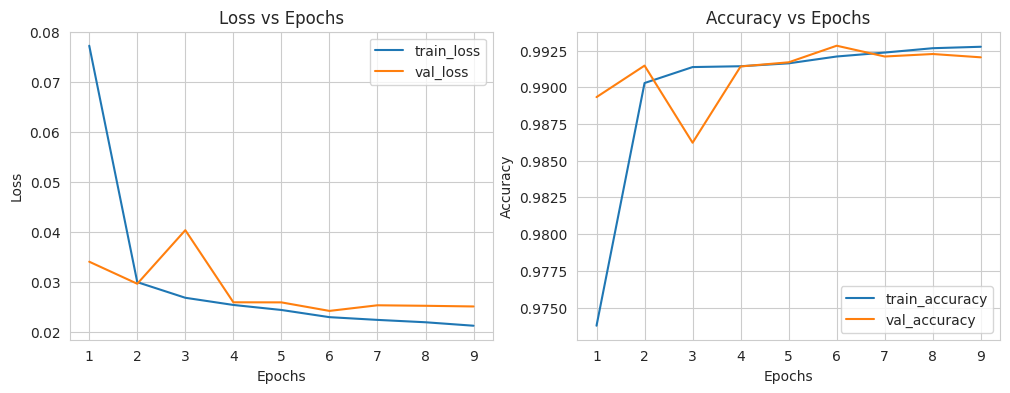

In [ ]:
# Graphical representation of (loss,val_loss) and (accuracy,val_accuracy)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(range(1, 10), ANN.history["loss"],label='train_loss')
plt.plot(range(1, 10), ANN.history["val_loss"],label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(1, 10), ANN.history["accuracy"],label='train_accuracy')
plt.plot(range(1, 10), ANN.history["val_accuracy"],label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()
plt.show()

In [ ]:
# From the above graph we analyse that at epochs=6, Loss will be minimum and accuracy will be optimum for both train and val(test) data.
# Then we refit the model at epochs=6.

ANN = Sequential()
ANN.add(Dense(units=64, activation='relu'))
ANN.add(Dense(units=32, activation='relu'))
ANN.add(Dense(units=1, activation='sigmoid'))
ANN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ANN=ANN.fit(Xtrain,Ytrain,batch_size=30,epochs=6,validation_data=(Xtest,Ytest),verbose=2,shuffle=True)

Epoch 1/6
2362/2362 - 9s - loss: 0.0796 - accuracy: 0.9726 - val_loss: 0.0374 - val_accuracy: 0.9892 - 9s/epoch - 4ms/step
Epoch 2/6
2362/2362 - 8s - loss: 0.0290 - accuracy: 0.9905 - val_loss: 0.0308 - val_accuracy: 0.9907 - 8s/epoch - 3ms/step
Epoch 3/6
2362/2362 - 8s - loss: 0.0265 - accuracy: 0.9909 - val_loss: 0.0294 - val_accuracy: 0.9911 - 8s/epoch - 4ms/step
Epoch 4/6
2362/2362 - 8s - loss: 0.0246 - accuracy: 0.9916 - val_loss: 0.0286 - val_accuracy: 0.9911 - 8s/epoch - 3ms/step
Epoch 5/6
2362/2362 - 9s - loss: 0.0241 - accuracy: 0.9916 - val_loss: 0.0278 - val_accuracy: 0.9914 - 9s/epoch - 4ms/step
Epoch 6/6
2362/2362 - 8s - loss: 0.0229 - accuracy: 0.9923 - val_loss: 0.0260 - val_accuracy: 0.9919 - 8s/epoch - 3ms/step


In [ ]:
Loss=round(ANN.history['loss'][-1],3)
accuracy=round(ANN.history['accuracy'][-1],5)
val_loss=round(ANN.history['val_loss'][-1],3)
val_accuracy=round(ANN.history['val_accuracy'][-1],5)

In [ ]:
# Result of ANN

data = [['Loss','{}%'.format(Loss*100)],['Accuracy','{}%'.format(accuracy*100)],
        ['ValLoss','{}%'.format(val_loss*100)],['ValAccuracy','{}%'.format(val_accuracy*100)]]
head = ['Result','Artificial Neural Network']
print(tabulate(data,headers=head, tablefmt='grid'))

+-------------+-----------------------------+
| Result      | Artificial Neural Network   |
+=============+=============================+
| Loss        | 2.3%                        |
+-------------+-----------------------------+
| Accuracy    | 99.226%                     |
+-------------+-----------------------------+
| ValLoss     | 2.6%                        |
+-------------+-----------------------------+
| ValAccuracy | 99.187%                     |
+-------------+-----------------------------+


-------
## **Model Comparison Report**:

In [ ]:
data = [['XG-Boosting',XGBC_accur*100,'1st(BEST)'],['Artificial Neural Network',val_accuracy*100,'2nd'],['Random Forest',RFC_accur*100,'3rd']
        ,['Gradient Boosting',GBC_accur*100,'4th'],['Decision Tree',DTC_accur*100,'5th']]
head = ['Model Name','Testing Accuracy(%)','Ranking order']
print(tabulate(data,headers=head, tablefmt='grid'))

# Best model for this dataset is XG-Boosting.

+---------------------------+-----------------------+-----------------+
| Model Name                |   Testing Accuracy(%) | Ranking order   |
+===========================+=======================+=================+
| XG-Boosting               |               99.2491 | 1st(BEST)       |
+---------------------------+-----------------------+-----------------+
| Artificial Neural Network |               99.187  | 2nd             |
+---------------------------+-----------------------+-----------------+
| Random Forest             |               99.1644 | 3rd             |
+---------------------------+-----------------------+-----------------+
| Gradient Boosting         |               98.3682 | 4th             |
+---------------------------+-----------------------+-----------------+
| Decision Tree             |               98.4078 | 5th             |
+---------------------------+-----------------------+-----------------+


--------
## **Challenges faced**:

We have to analyse EDA part with respect to acceleration_x, acceleration_y, acceleration_z, gyro_x, gyro_y and gyro_z and have to understand its relation with respect to wrist and activity.

-------